In [1]:
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import pandas_datareader as  web
import matplotlib.pyplot as pp
from datetime import datetime, timedelta, date

In [2]:
start = datetime(1970,1,2)
end = datetime(2021,12,31)

df_SPY = pdr.DataReader('SPY','yahoo',start,end) #미국 주식
df_EFA = pdr.DataReader('EFA','yahoo',start,end) #미국 외 선진국 주식
df_EEM = pdr.DataReader('EEM','yahoo',start,end) #신흥국 주식
df_DBC = pdr.DataReader('DBC','yahoo',start,end) #원자재
df_GLD = pdr.DataReader('GLD','yahoo',start,end) #금
df_EDV = pdr.DataReader('EDV','yahoo',start,end) #미국 제로쿠폰 장기국채
df_LTPZ = pdr.DataReader('LTPZ','yahoo',start,end) #물가연동채
df_LQD = pdr.DataReader('LQD','yahoo',start,end) #미국 회사채
df_EMLC = pdr.DataReader('EMLC','yahoo',start,end) #신흥국 채권


In [3]:
#LOG 수익률 계산
SPY_PROFIT = df_SPY['Close'].pct_change()*100
SPY_PROFIT.iloc[0] = 0

EFA_PROFIT = df_EFA['Close'].pct_change()*100
EFA_PROFIT.iloc[0] = 0

EEM_PROFIT = df_EEM['Close'].pct_change()*100
EEM_PROFIT.iloc[0] = 0

DBC_PROFIT = df_DBC['Close'].pct_change()*100
DBC_PROFIT.iloc[0] = 0

GLD_PROFIT = df_GLD['Close'].pct_change()*100
GLD_PROFIT.iloc[0] = 0

EDV_PROFIT = df_EDV['Close'].pct_change()*100
EDV_PROFIT.iloc[0] = 0

LTPZ_PROFIT = df_LTPZ['Close'].pct_change()*100
LTPZ_PROFIT.iloc[0] = 0

LQD_PROFIT = df_LQD['Close'].pct_change()*100
LQD_PROFIT.iloc[0] = 0

EMLC_PROFIT = df_EMLC['Close'].pct_change()*100
EMLC_PROFIT.iloc[0] = 0

In [4]:
SPY_LOG_PROFIT = np.log(SPY_PROFIT +1)
EFA_LOG_PROFIT = np.log(EFA_PROFIT +1)
EEM_LOG_PROFIT = np.log(EEM_PROFIT +1)
DBC_LOG_PROFIT = np.log(DBC_PROFIT +1)
GLD_LOG_PROFIT = np.log(GLD_PROFIT +1)
EDV_LOG_PROFIT = np.log(EDV_PROFIT +1)
LTPZ_LOG_PROFIT = np.log(LTPZ_PROFIT +1)
LQD_LOG_PROFIT = np.log(LQD_PROFIT +1)
EMLC_LOG_PROFIT = np.log(EMLC_PROFIT +1)

C:\Users\sjo20\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
#LOG 누적 수익률
SPY_LOG_PROFIT_ACC = SPY_LOG_PROFIT.cumsum()
EFA_LOG_PROFIT_ACC = EFA_LOG_PROFIT.cumsum()
EEM_LOG_PROFIT_ACC = EEM_LOG_PROFIT.cumsum()
DBC_LOG_PROFIT_ACC = DBC_LOG_PROFIT.cumsum()
GLD_LOG_PROFIT_ACC = GLD_LOG_PROFIT.cumsum()
EDV_LOG_PROFIT_ACC = EDV_LOG_PROFIT.cumsum()
LTPZ_LOG_PROFIT_ACC = LTPZ_LOG_PROFIT.cumsum()
LQD_LOG_PROFIT_ACC = LQD_LOG_PROFIT.cumsum()
EMLC_LOG_PROFIT_ACC = EMLC_LOG_PROFIT.cumsum()

In [9]:
pf = (SPY_LOG_PROFIT_ACC * 0.12) + (EFA_LOG_PROFIT_ACC * 0.12) + (EEM_LOG_PROFIT_ACC * 0.12) + (DBC_LOG_PROFIT_ACC * 0.07) + (GLD_LOG_PROFIT_ACC * 0.07) + (EDV_LOG_PROFIT_ACC * 0.18) + (LTPZ_LOG_PROFIT_ACC * 0.18) + (LQD_LOG_PROFIT_ACC * 0.07) + (EMLC_LOG_PROFIT_ACC * 0.07)

pf = pf.dropna()
pf

Date
2010-07-26    114.186400
2010-07-28    114.008230
2010-07-29    114.017589
2010-07-30    114.486053
2010-08-03    114.945619
                 ...    
2021-12-22    124.323180
2021-12-27    124.831238
2021-12-28    124.422173
2021-12-30    124.396571
2021-12-31    124.213932
Name: Close, Length: 1514, dtype: float64

In [10]:
pf_data = (df_SPY['Close']*0.12) +(df_EFA['Close']*0.12) +(df_EEM['Close']*0.12) +(df_DBC['Close']*0.07) +(df_GLD['Close']*0.07) +(df_EDV['Close']*0.18) +(df_LTPZ['Close']*0.18) +(df_LQD['Close']*0.07) +(df_EMLC['Close']*0.07)

pf_data = pf_data.dropna()
pf_data

Date
2010-07-23     71.286200
2010-07-26     71.416300
2010-07-27     71.069100
2010-07-28     71.019001
2010-07-29     71.012300
                 ...    
2021-12-27    139.111300
2021-12-28    138.769899
2021-12-29    138.362801
2021-12-30    138.778500
2021-12-31    138.641999
Name: Close, Length: 2882, dtype: float64

In [11]:
window = 20
max_window = pf_data.rolling(window, min_periods=1).max()
dd=((pf_data/max_window)-1)*100
mdd = dd.rolling(window,min_periods=1 ).min()

print(mdd)

Date
2010-07-23    0.000000
2010-07-26    0.000000
2010-07-27   -0.486163
2010-07-28   -0.556314
2010-07-29   -0.565697
                ...   
2021-12-27   -2.602737
2021-12-28   -2.602737
2021-12-29   -2.602737
2021-12-30   -2.150085
2021-12-31   -2.150085
Name: Close, Length: 2882, dtype: float64


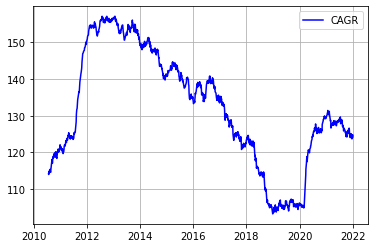

In [12]:
plt.plot(pf.index, pf,'b',label='CAGR')

plt.grid(True)
plt.legend(loc='best')
plt.show()

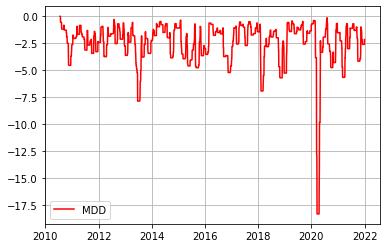

In [13]:
plt.plot(mdd.index, mdd, 'r', label='MDD')

plt.grid(True)
plt.legend(loc='best')
plt.show()